In [34]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# Dataset from https://www.kaggle.com/jessemostipak/hotel-booking-demand

df = pd.read_csv('./Data/hotel_bookings.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.arrival_date_month = df.arrival_date_month.apply(lambda value: 1
if value == 'January' else 2
if value == 'February' else 3
if value == 'March' else 4
if value == 'April' else 5
if value == 'May' else 6
if value == 'June' else 7
if value == 'July' else 8
if value == 'August' else 9
if value == 'September' else 10
if value == 'October' else 11
if value == 'November' else 12)

In [5]:
df['date'] = pd.to_datetime(df['arrival_date_year'].map(str) + '-' + df['arrival_date_month'].map(str) + '-' + df['arrival_date_day_of_month'].map(str))

In [6]:
df.date

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: date, Length: 119390, dtype: datetime64[ns]

In [7]:
df['weekday'] = df['date'].dt.day_name()


In [8]:
df.weekday

0         Wednesday
1         Wednesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
119385    Wednesday
119386     Thursday
119387     Thursday
119388     Thursday
119389      Tuesday
Name: weekday, Length: 119390, dtype: object

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'date', 'weekday'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  int64         
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [11]:
null_df = pd.DataFrame({'Null_Values': df.isna().sum(), 'Percentage': round((df.isna().sum())/(df.shape[0])*(100),2)})
null_df

,Null_Values,Percentage
hotel,0,0.00
is_canceled,0,0.00
lead_time,0,0.00
arrival_date_year,0,0.00
arrival_date_month,0,0.00
arrival_date_week_number,0,0.00
arrival_date_day_of_month,0,0.00
stays_in_weekend_nights,0,0.00
stays_in_week_nights,0,0.00
adults,0,0.00


<AxesSubplot:>

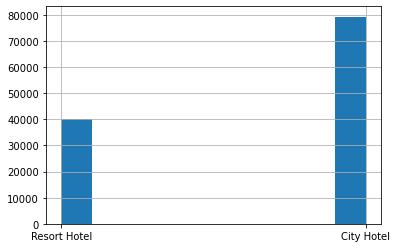

In [94]:
df.hotel.hist()

<AxesSubplot:>

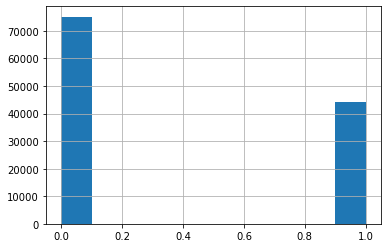

In [92]:
df.is_canceled.hist()

<AxesSubplot:>

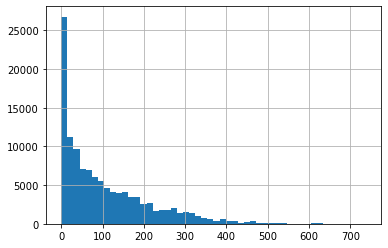

In [36]:
df.lead_time.hist(bins = 50)

<AxesSubplot:>

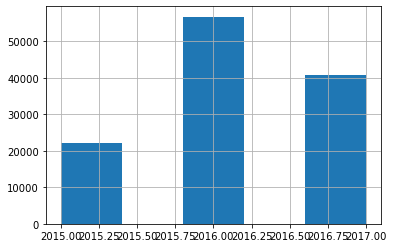

In [90]:
df.arrival_date_year.hist(bins = 5)

hotel
City Hotel      AxesSubplot(0.125,0.125;0.775x0.755)
Resort Hotel    AxesSubplot(0.125,0.125;0.775x0.755)
Name: arrival_date_month, dtype: object

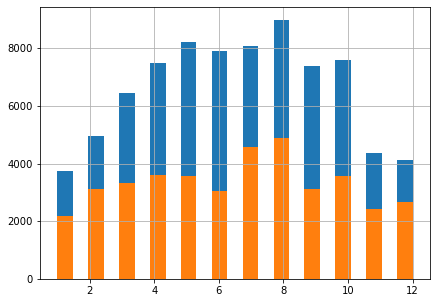

In [89]:
df.arrival_date_month.groupby(df.hotel).hist(bins = 23, figsize = [7 , 5])

<AxesSubplot:>

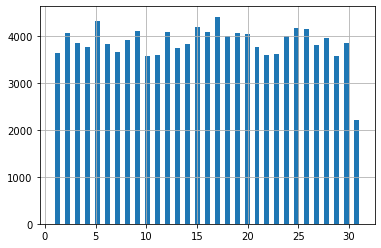

In [88]:
df.arrival_date_day_of_month.hist(bins = 61)

hotel
City Hotel      AxesSubplot(0.125,0.125;0.775x0.755)
Resort Hotel    AxesSubplot(0.125,0.125;0.775x0.755)
Name: stays_in_weekend_nights, dtype: object

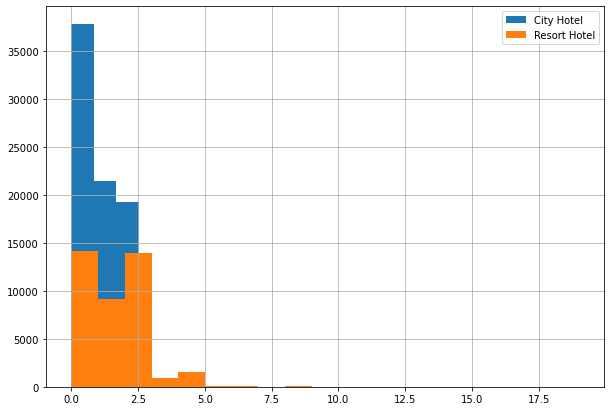

In [87]:
df.stays_in_weekend_nights.groupby(df.hotel).hist(bins = df.stays_in_weekend_nights.max(), figsize = [10,7], legend = True)

hotel
City Hotel      AxesSubplot(0.125,0.125;0.775x0.755)
Resort Hotel    AxesSubplot(0.125,0.125;0.775x0.755)
Name: stays_in_weekend_nights, dtype: object

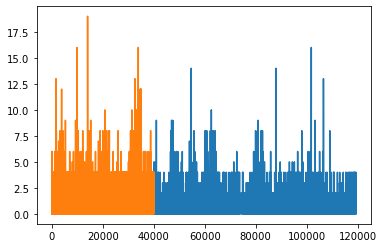

In [79]:
df.stays_in_weekend_nights.groupby(df.hotel).plot()

hotel
City Hotel      AxesSubplot(0.125,0.125;0.775x0.755)
Resort Hotel    AxesSubplot(0.125,0.125;0.775x0.755)
Name: weekday, dtype: object

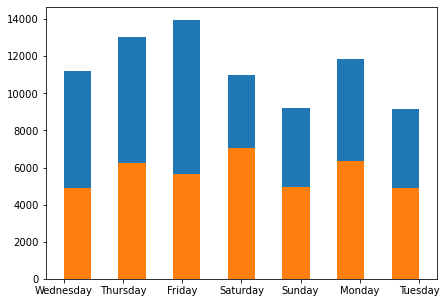

In [84]:
df.weekday.groupby(df.hotel).hist(bins = 13, grid = False, figsize = [7, 5])

In [69]:
df_overview = df[['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month', 'weekday', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status']]

hotel
City Hotel      [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
Resort Hotel    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
dtype: object

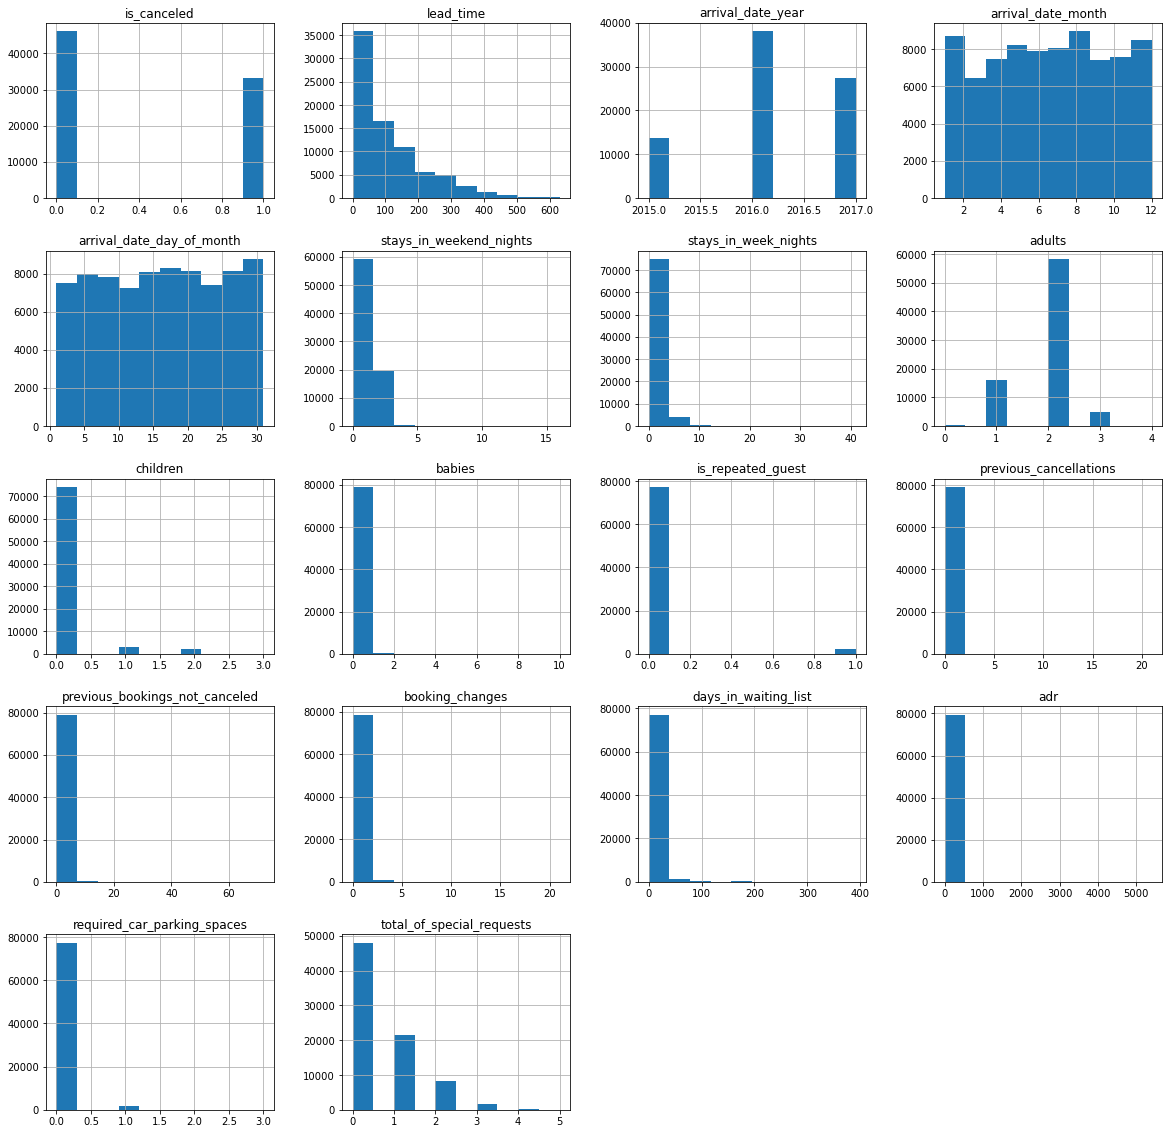

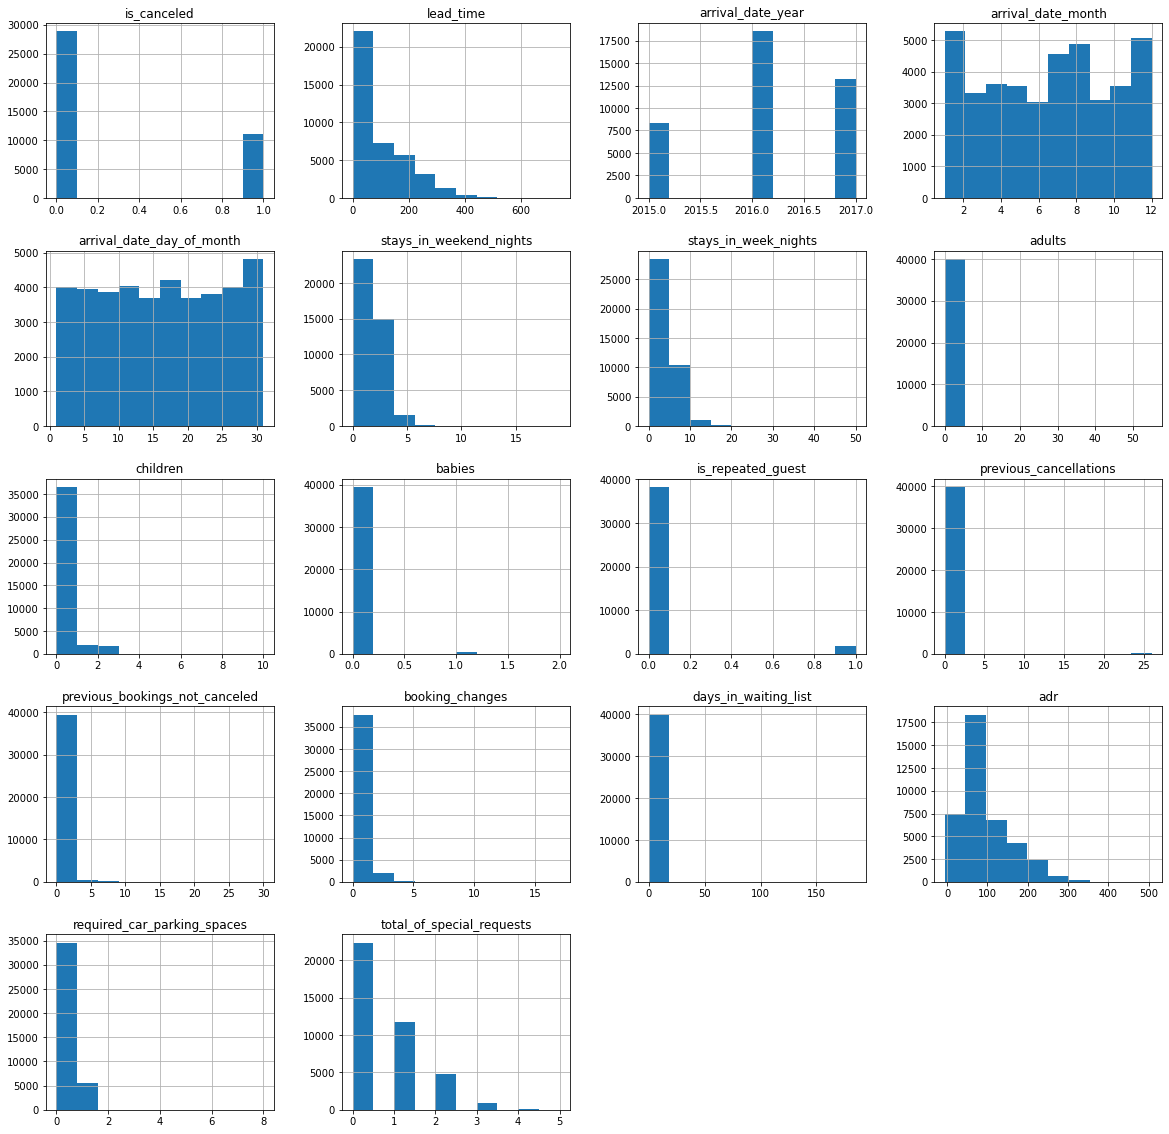

In [70]:
df_overview.groupby(df_overview.hotel).hist(figsize = [20, 20])

weekday
Friday       [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
Monday       [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
Saturday     [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
Sunday       [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
Thursday     [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
Tuesday      [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
Wednesday    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
dtype: object

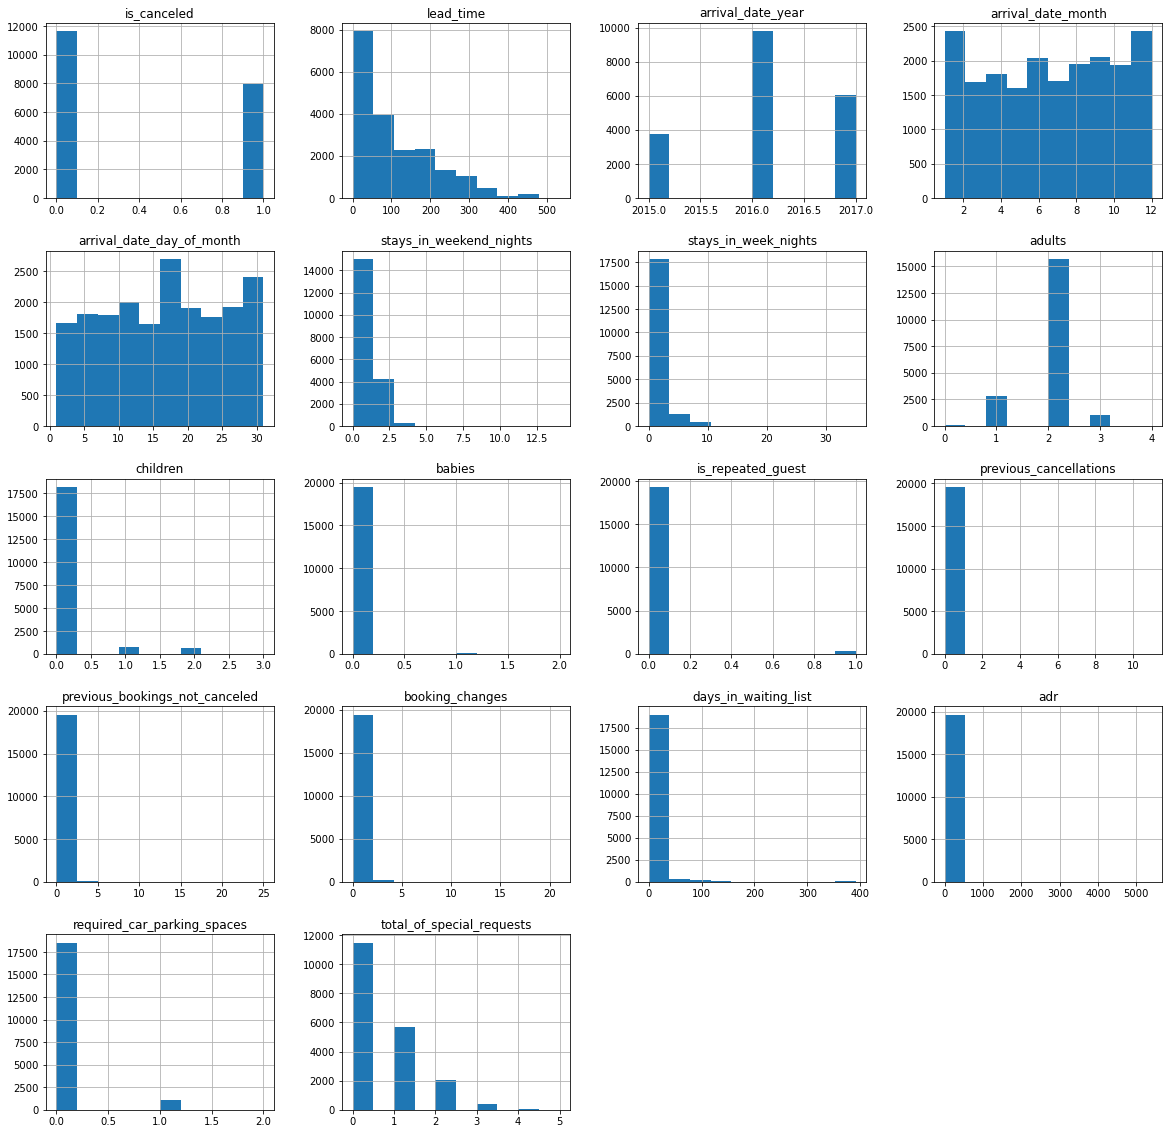

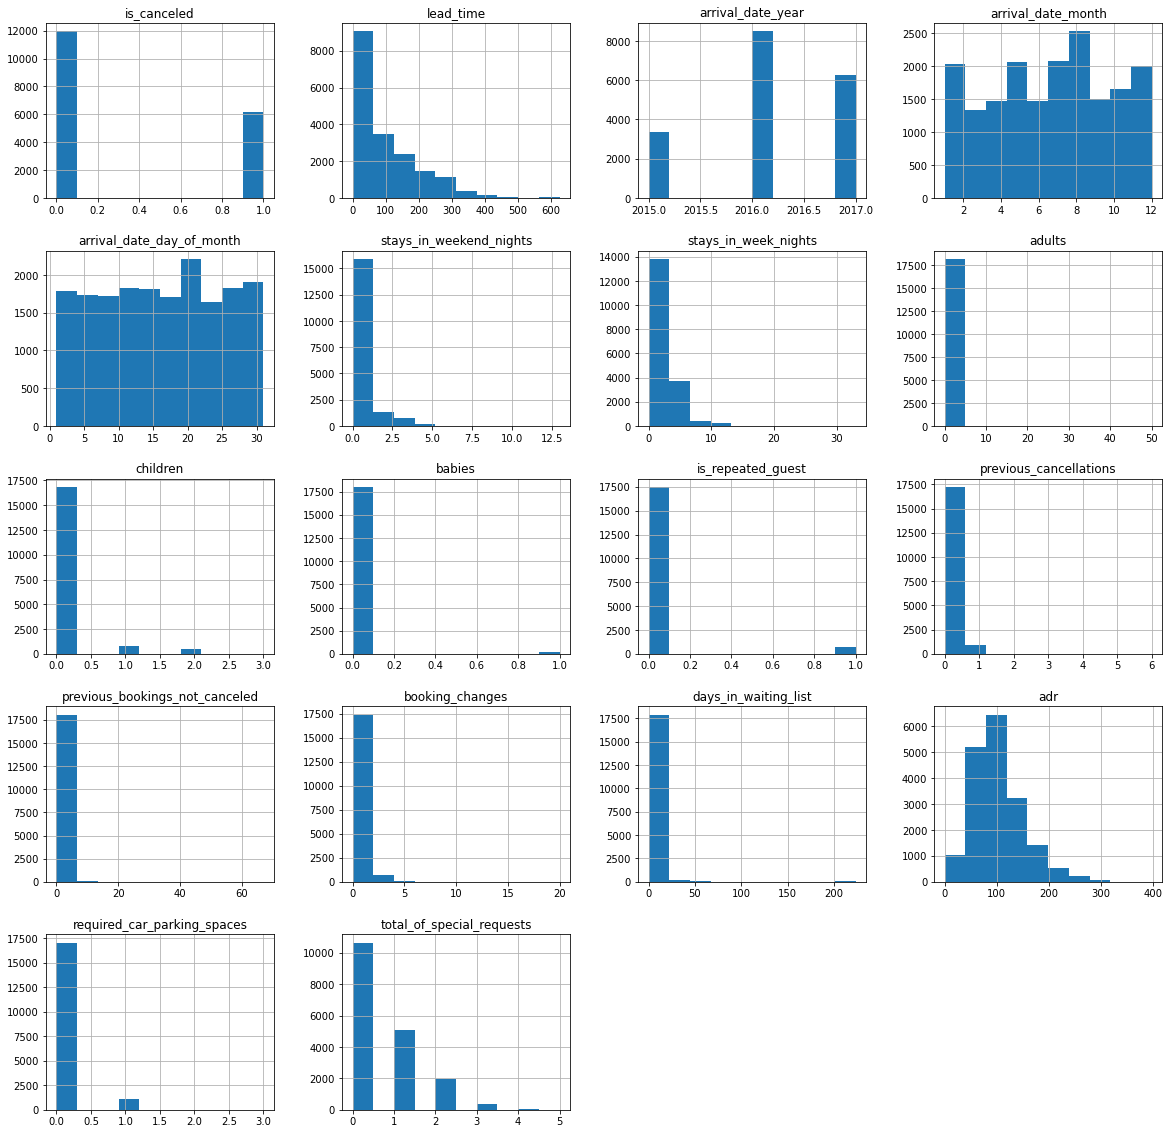

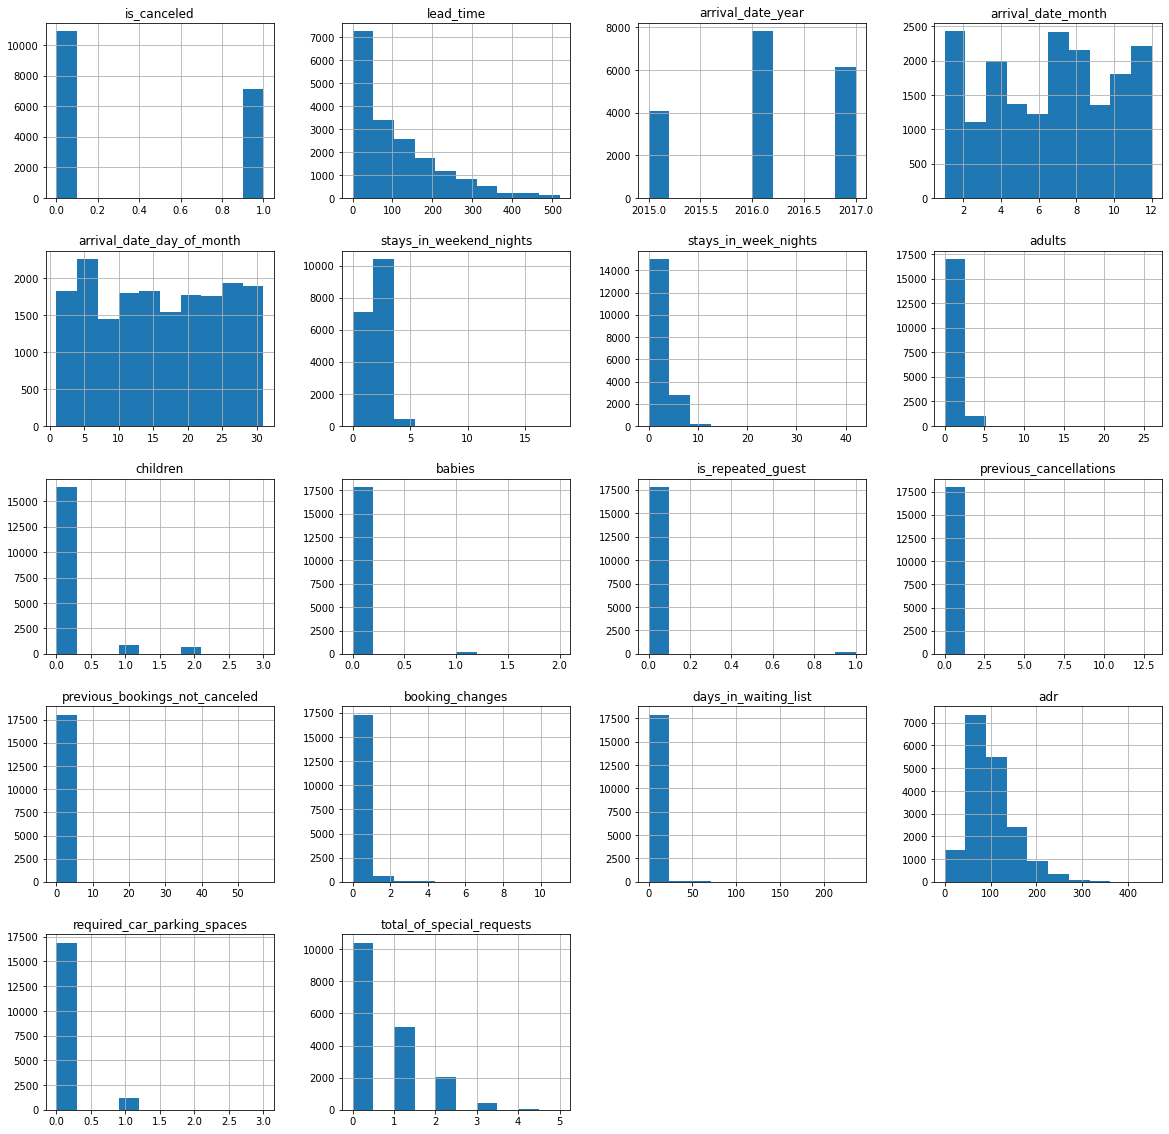

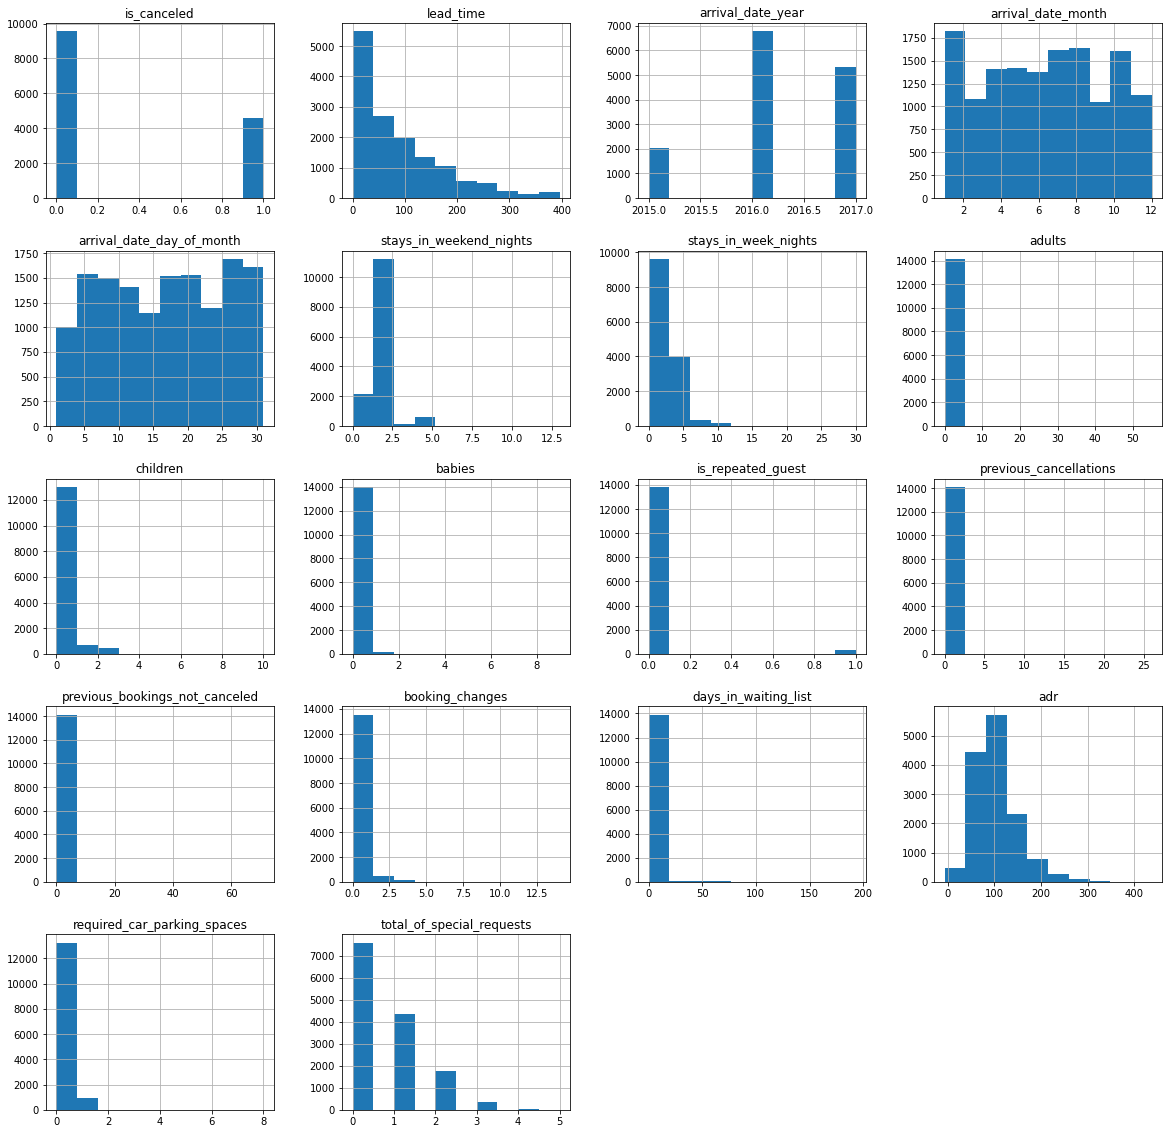

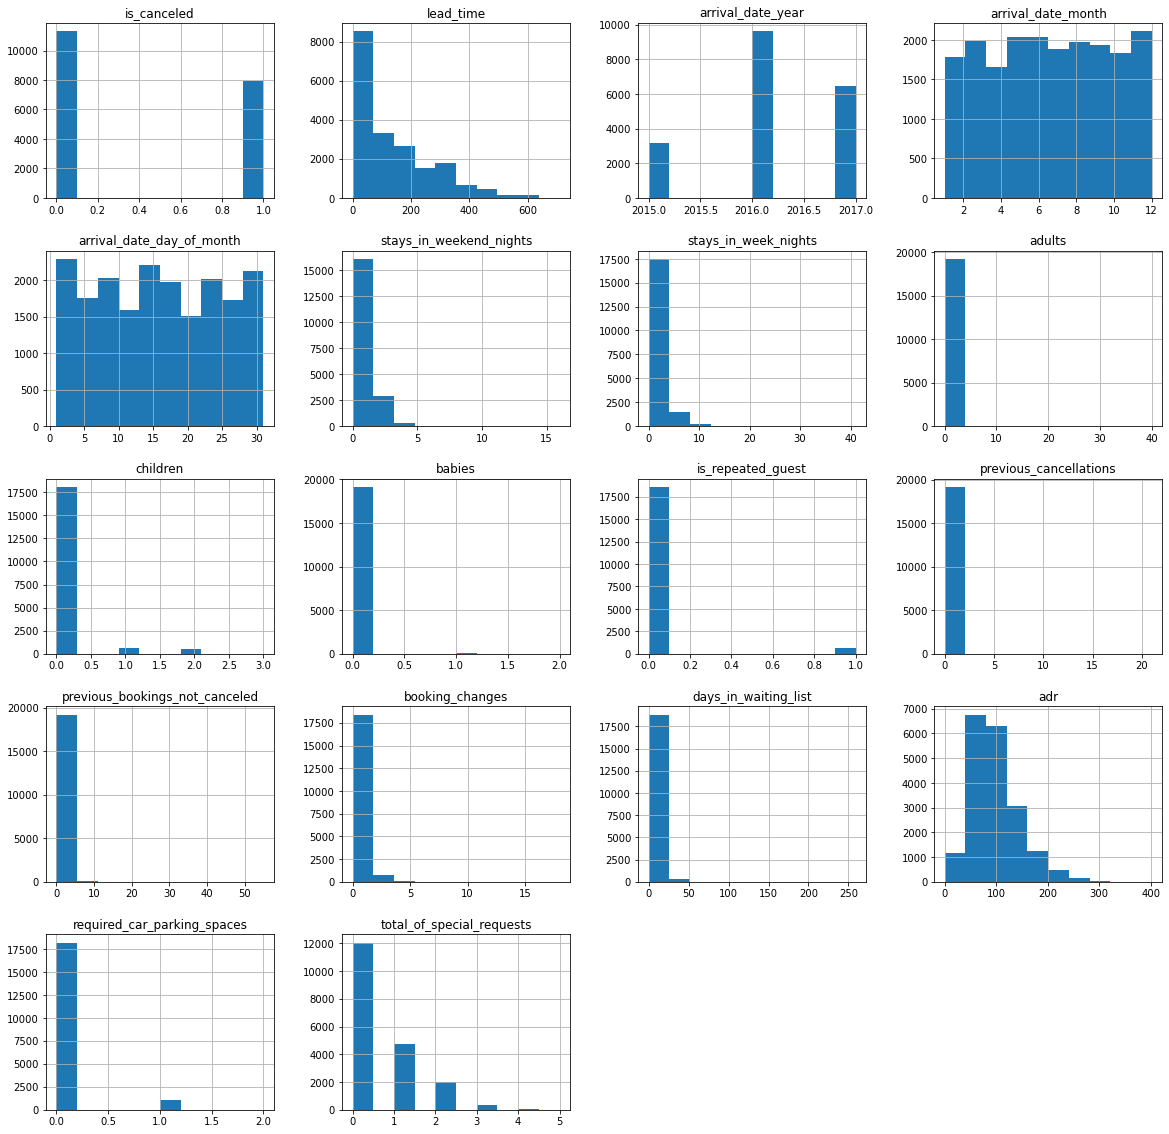

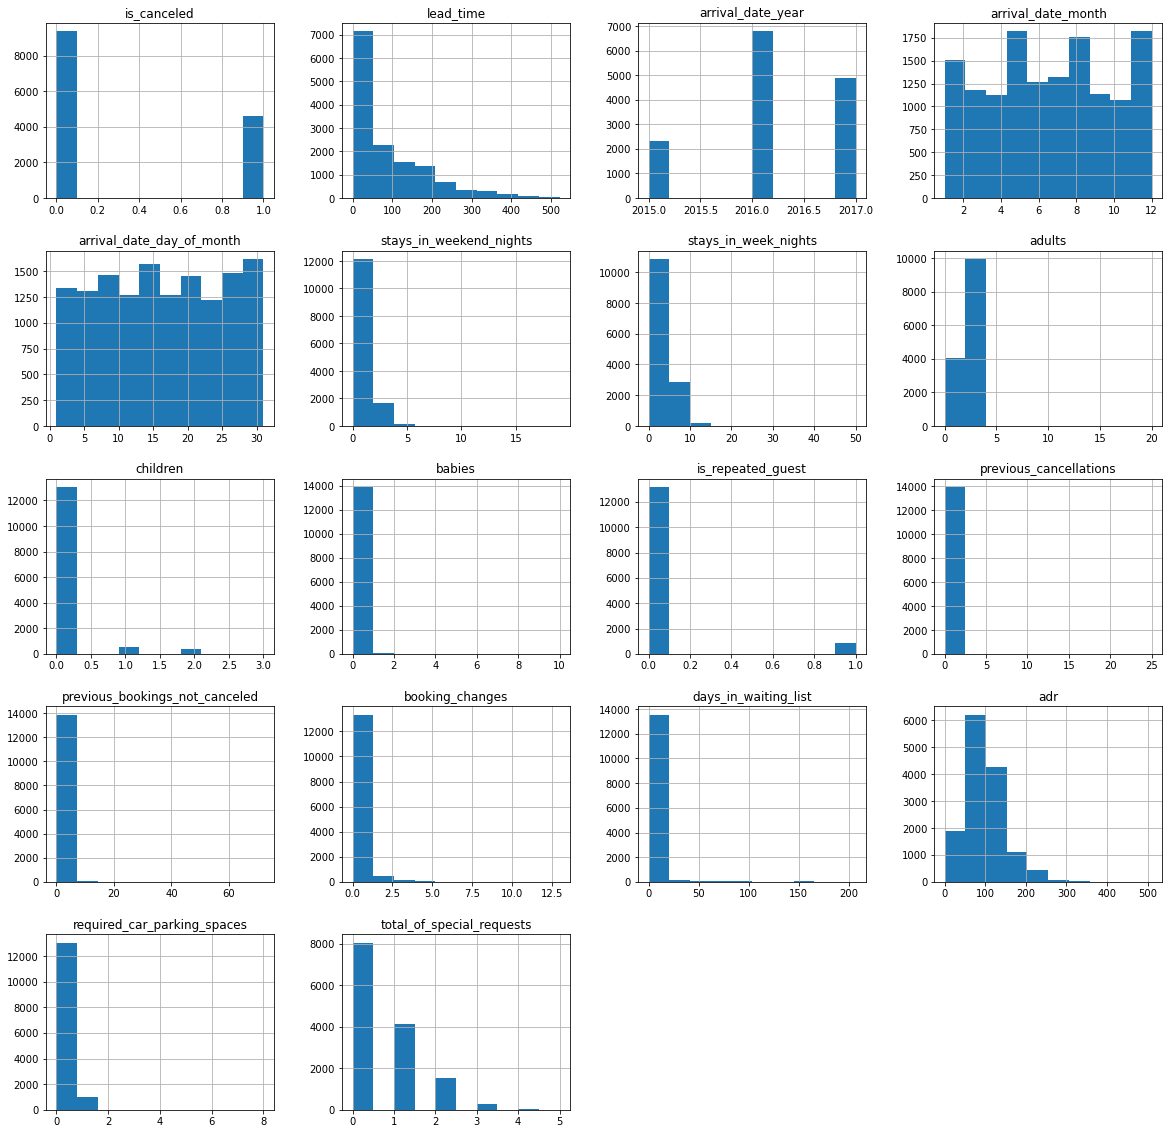

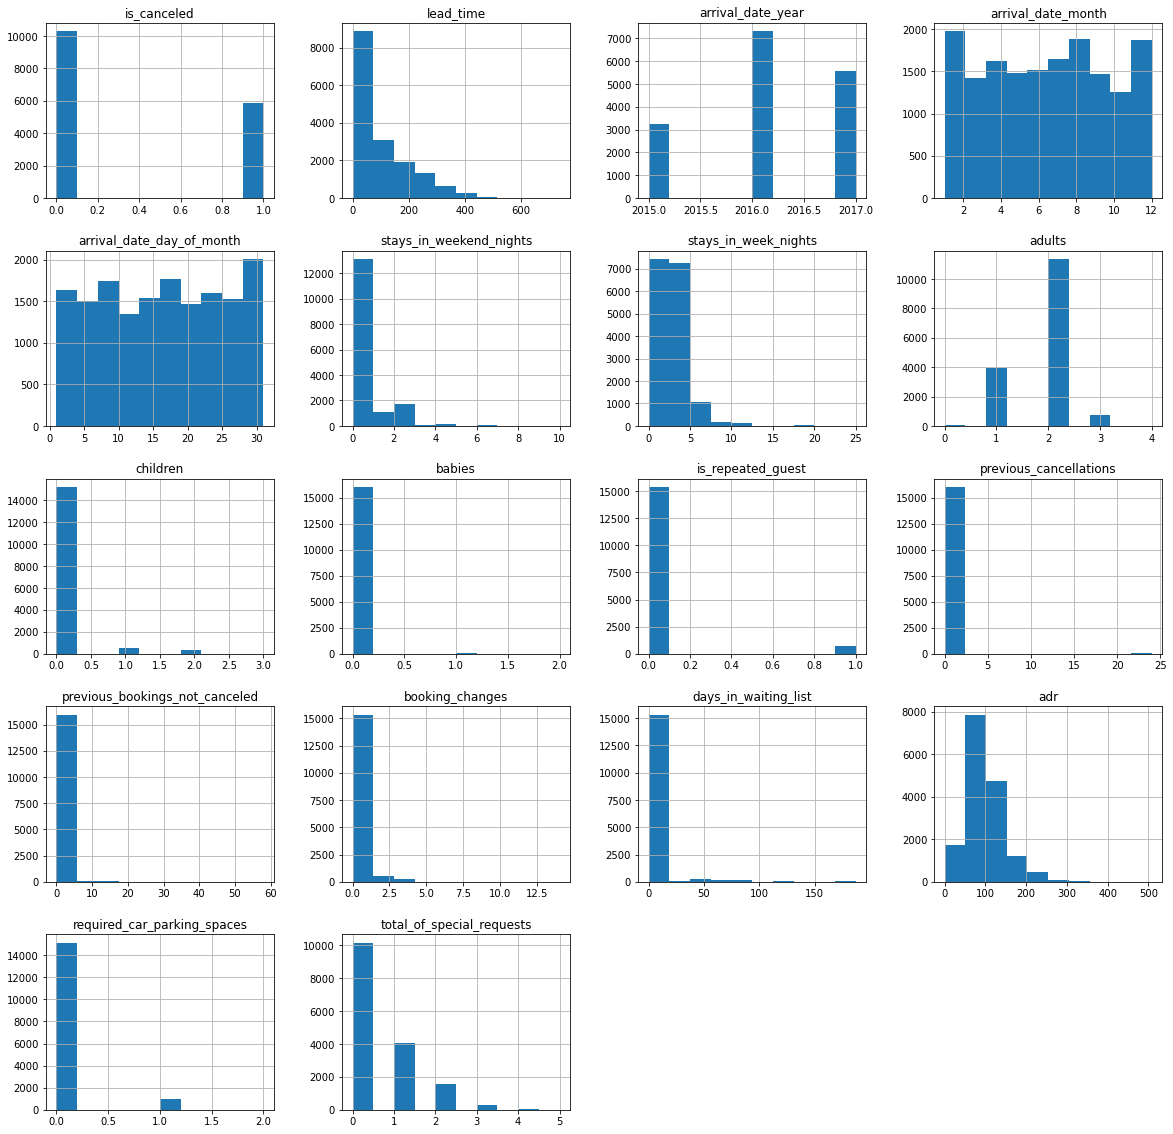

In [71]:
df_overview.groupby(df_overview.weekday).hist(figsize = [20, 20])

In [105]:
df.adr.groupby(df.hotel).mean()

hotel
City Hotel      105.304465
Resort Hotel     94.952930
Name: adr, dtype: float64

In [110]:
df[df.adr == df.adr.max()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date,weekday
48515,City Hotel,1,35,2016,3,13,25,0,1,2,...,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19,2016-03-25,Friday


In [21]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'date', 'weekday'],
      dtype='object')